<a href="https://colab.research.google.com/github/Saitamacode/League-of-Legos-/blob/main/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()


Saving leagueData.csv to leagueData.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['leagueData.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()
df["Objectives For"] = df["Dragons For"] + df["Barons For"]
df["KDA"] = (df["Kills"]+df["Assists"])/df["Deaths"]
df.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result,Objectives For,KDA
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L,0,1.400000
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W,5,12.000000
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L,0,1.750000
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W,5,3.750000
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L,0,1.666667


In [ ]:
x = pd.DataFrame({
    'Result' : df['Result'].map({'L' : 0, 'W' : 1}),
    'Kill Participation' :  df['Kill Participation'],
    'Gold Earned' : df['Gold Earned'],
})

y= x['Result']

X = x.iloc[:, 1:]
'''scaler = preprocessing.RobustScaler()
new = scaler.fit_transform(x)
new = pd.DataFrame(robust_df, columns = ['Kill Participation' , 'Gold Earned'])
'''

'''scaler = preprocessing.StandardScaler()
new = scaler.fit_transform(x)
new = pd.DataFrame(new, columns = ['Kill Participation' , 'Gold Earned'])
'''

X_scaled = StandardScaler().fit_transform(X)


In [ ]:
'''fig, ax = plt.subplots()
colors = {"Top": "red", "Jungle" : "green", "Mid" : "blue", "Adc" : "yellow", "Support" : "orange"}
colors2 = {"L" : "red", "W" : "green"}

ax.scatter(new['Kill Participation'], new['Gold Earned'], c=df['Result'].map(colors2))

plt.show()'''

pca = IncrementalPCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(
             X_pca, y, test_size = 0.2, random_state=42)

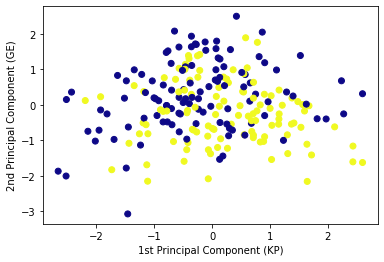

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = y, cmap = 'plasma')
plt.xlabel('1st Principal Component (KP)')
plt.ylabel('2nd Principal Component (GE)')
plt.show()

[1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 0 0 1]
0.6136363636363636


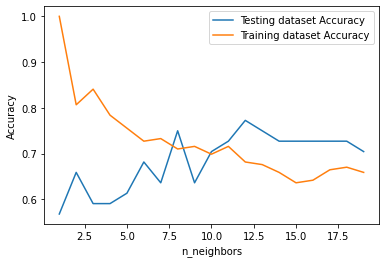

array([0.56818182, 0.65909091, 0.59090909, 0.59090909, 0.61363636,
       0.68181818, 0.63636364, 0.75      , 0.63636364, 0.70454545,
       0.72727273, 0.77272727, 0.75      , 0.72727273, 0.72727273,
       0.72727273, 0.72727273, 0.72727273, 0.70454545])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    # Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

test_accuracy

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.67      0.78      0.72        18

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.76      0.75      0.75        44

[[19  7]
 [ 4 14]]


In [ ]:
# Getting the Accuracy of the k-Means Clustering Model
print('Accuracy of the Model: ', metrics.accuracy_score(y_test, y_pred))
print()

# Getting the Precision of the k-Means Clustering Model
print('Precision of the Model: ', metrics.precision_score(y_test, y_pred))
print()

# Getting the Recall of the k-Means Clustering Model
print('Recall of the Model: ', metrics.recall_score(y_test, y_pred))
print()

# Getting the F1-Score of the k-Means Clustering Model
print('F1-Score of the Model: ', metrics.f1_score(y_test, y_pred))
print()

Accuracy of the Model:  0.75

Precision of the Model:  0.6666666666666666

Recall of the Model:  0.7777777777777778

F1-Score of the Model:  0.717948717948718

